## KMeans

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import random
import timeit

## The Beginning

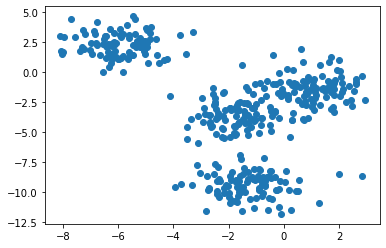

In [2]:
#Adding some variables for blobs creating

SAMPLE_QUANTITY = 400
SAMPLE_FEATURES = 2
SAMPLE_CENTERS = 4
NUM_OF_CLUSTERS = 4
RAND_STATE = 2

#Creating samples
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples = SAMPLE_QUANTITY, n_features = SAMPLE_FEATURES, 
                  centers = SAMPLE_CENTERS, random_state = RAND_STATE)
samples = x

# Creating visual representaion of all samples
plt.scatter(samples[:,0], samples[:,1])

## Function declarations

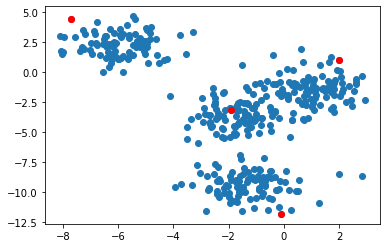

In [3]:
def find_sample_distance(i, j):
    """
        Return distance between two samples: (samples[i,0], samples[,1])
        and (samples[j,0], samples[j,1]);
    """
    return math.sqrt( (samples[i,0] - samples[j,0]) ** 2 + (samples[i,1] - samples[j,1]) ** 2)

#Matrix of distances between samples: samples_distance[i][j] - distance between i and j samples
samples_distance = np.zeros([SAMPLE_QUANTITY, SAMPLE_QUANTITY])

#Filling in the matrix
for i in range(SAMPLE_QUANTITY):
    for j in range(i + 1, SAMPLE_QUANTITY):
        samples_distance[i][j] = samples_distance[j][i] = find_sample_distance(i,j)

#a_1 is array with indexes of the cluster each sample belongs to.
a_1 = np.zeros(SAMPLE_QUANTITY)

#Rand seed for fixed random
random.seed(4)

def create_max_dist_centers(num_of_cluster, sample_quantity):
    """
        Choosing centers as samples with max distance between each other;
    """
    cluster_centers_list = []
    a = round((random.random() * sample_quantity))
    cluster_centers_list.append(list(samples[a]))
    remote_sample = []
    distance_sum = np.zeros(sample_quantity)
    mask = np.zeros(sample_quantity)
    mask = mask > 0
    mask[(samples - cluster_centers_list[0])[:,0] == 0] = True
    for i in range(1, num_of_cluster):
        distance_to_centers = np.sqrt(np.sum(np.square(samples - cluster_centers_list[i - 1]), axis = 1))
        distance_sum += distance_to_centers
        distance_sum[mask] = 0
        remote_sample = samples[np.argmax(distance_sum)]
        mask[np.argmax(distance_sum)] = 1
        cluster_centers_list.append(list(remote_sample))
        
    return cluster_centers_list

def create_random_sample_centers(num_of_clusters, sample_quantity, samples):
    """
        Choosing centers as random samples;
    """
    cluster_centers_list = []
    x = np.copy(samples)
    np.random.shuffle(x)
    for i in range(num_of_clusters):
        cluster_centers_list.append(x[i])
    return cluster_centers_list
    
def create_random_centers(num_of_clusters,  samples):
    cluster_centers_list = ((np.max(samples) - np.min(samples))*np.random.random((num_of_clusters,2)) +
                                np.min(samples))
    return cluster_centers_list
                                
    

#Visualisation of the first array of cluster centers:

cluster_centers_list_1 = create_max_dist_centers(NUM_OF_CLUSTERS, SAMPLE_QUANTITY)
cluster_centers_list_1 = np.array(cluster_centers_list_1)

plt.scatter(samples[:,0], samples[:,1])
plt.scatter(cluster_centers_list_1[:,0], cluster_centers_list_1[:,1], c = "red")

###

def find_center_distance(cluster_centers_list, num_of_cluster, sample_quantity):
    """
        Function finds distance from every center to all samples;
    """
    center_distances = np.zeros([sample_quantity, num_of_cluster])
    for i in range(num_of_cluster):
        center_distances[:,i] = np.sqrt(np.sum(np.square(samples - cluster_centers_list[i]), axis = 1))
    return center_distances
        
def cluster_assignment(a, center_distances, sample_quantity):
    """
        Function assigns samples to the nearest cluster;
    """
    for i in range(sample_quantity):
        a[i] = np.argmin(center_distances[i,:])
        

def update_center(a, new_cluster_centers_list, num_of_cluster, sample_quantity):
    """
        Function updates all centers;
    """
    for i in range(num_of_cluster):
        if ((a == i).sum()):
            new_cluster_centers_list[i] = np.sum(samples[(a == i)], axis = 0)/(a == i).sum()
    return new_cluster_centers_list

def clust_iteration(a, cluster_centers_list, num_of_cluster, sample_quantity):
    """
        Function assigns samples and updates centers until the centers are fixed
    """
    new_cluster_centers_list = np.copy(cluster_centers_list)
    
    center_distances = find_center_distance(cluster_centers_list, num_of_cluster, sample_quantity)
    cluster_assignment(a, center_distances, sample_quantity)
    new_cluster_centers_list = update_center(a, new_cluster_centers_list, num_of_cluster, sample_quantity)
    while not(np.array_equal(new_cluster_centers_list, cluster_centers_list)):
        cluster_centers_list = np.copy(new_cluster_centers_list)
        center_distances = find_center_distance(cluster_centers_list, num_of_cluster, sample_quantity)
        cluster_assignment(a, center_distances, sample_quantity)
        new_cluster_centers_list = update_center(a, new_cluster_centers_list, num_of_cluster, sample_quantity)
    return cluster_centers_list
    
        

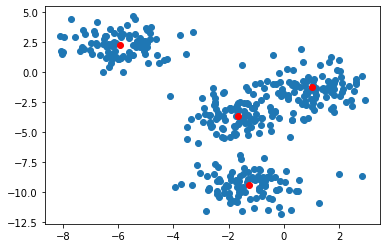

In [4]:
#Visualisation after all iterations

center_distances_1 = np.zeros([SAMPLE_QUANTITY, NUM_OF_CLUSTERS])

cluster_centers_list_1 = clust_iteration(a_1, cluster_centers_list_1, NUM_OF_CLUSTERS, SAMPLE_QUANTITY)


plt.scatter(samples[:,0], samples[:,1])
plt.scatter(cluster_centers_list_1[:,0], cluster_centers_list_1[:,1], c = "red")

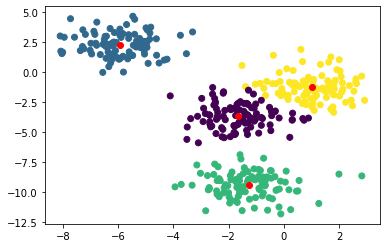

In [5]:
#Visualisation with clusters

plt.scatter(samples[:, 0], samples[:, 1], c = a_1)
plt.scatter(cluster_centers_list_1[:,0], cluster_centers_list_1[:,1], c = "red")

## Hand-Made KMeans 

In [6]:
cluster_centers_to_draw = np.array([])

def HMKmeans(samples, num_of_clusters, rand_state, mode = "random_samples"):
    
    sample_quantity = samples.size//2
    samples_distance = np.zeros([sample_quantity, sample_quantity])
    for i in range(sample_quantity):
        for j in range(i + 1, sample_quantity):
            samples_distance[i][j] = samples_distance[j][i] = find_sample_distance(i,j)
    a = np.zeros(sample_quantity)
    cluster_centers_list = []
    np.random.seed(rand_state)
    random.seed(rand_state)
    if (mode == "random_samples"):
        cluster_centers_list = create_random_sample_centers(num_of_clusters, sample_quantity, samples)
    elif (mode == "random"):
        cluster_centers_list = create_random_centers(num_of_clusters, samples)
    elif (mode == "max_dist"):
        cluster_centers_list = create_max_dist_centers(num_of_clusters, sample_quantity )

    cluster_centers_list = np.array(cluster_centers_list)
    
    cluster_centers_list = clust_iteration(a, cluster_centers_list, num_of_clusters, sample_quantity)

    
    
    global cluster_centers_to_draw
    cluster_centers_to_draw = np.copy(cluster_centers_list)
    return a


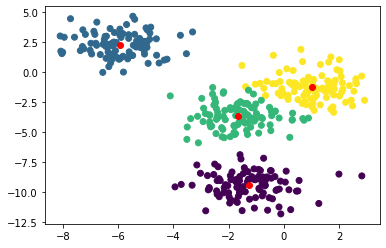

In [7]:
#Visualising the result of my function

a = HMKmeans(samples, NUM_OF_CLUSTERS, 4)
plt.scatter(samples[:, 0], samples[:, 1], c = a)
plt.scatter(cluster_centers_to_draw[:, 0], cluster_centers_to_draw[:, 1], c = "red")

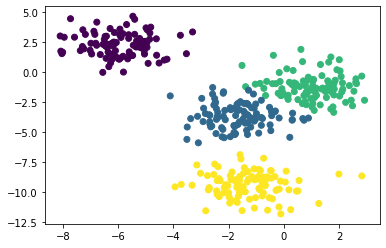

In [8]:
#And compairing it with the sklearn function

from sklearn.cluster import KMeans
a = KMeans(n_clusters = 4, random_state = 2).fit_predict(x)
plt.scatter(x[:,0],x[:,1], c = a)

## Random Tests and Examples


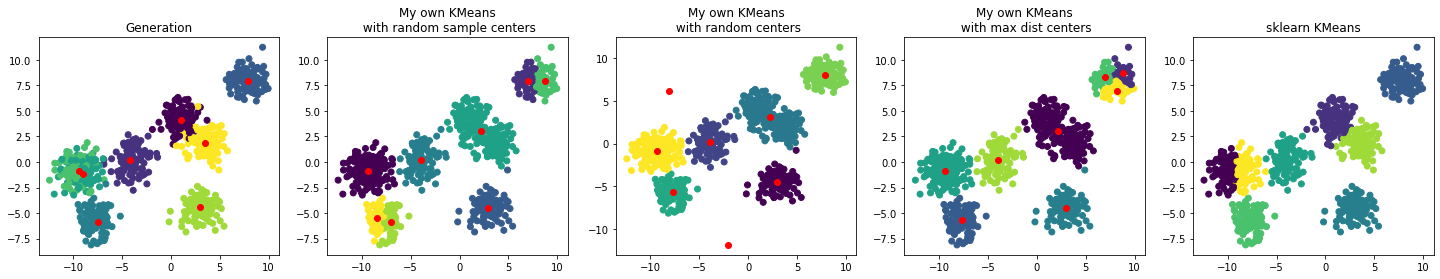

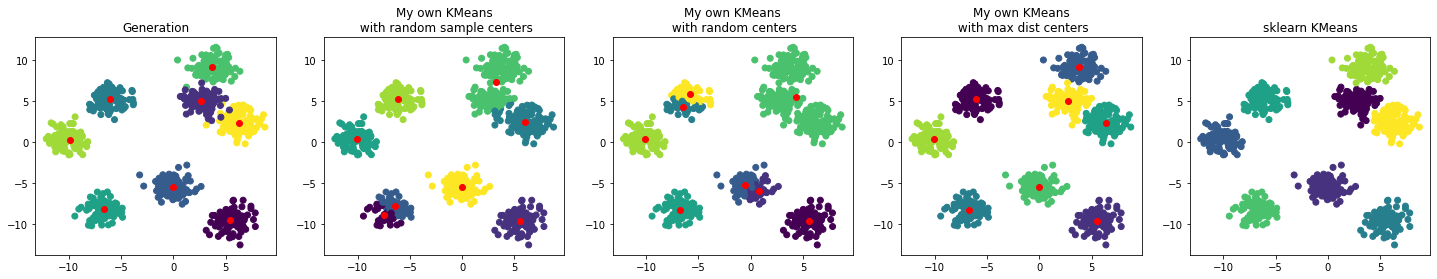

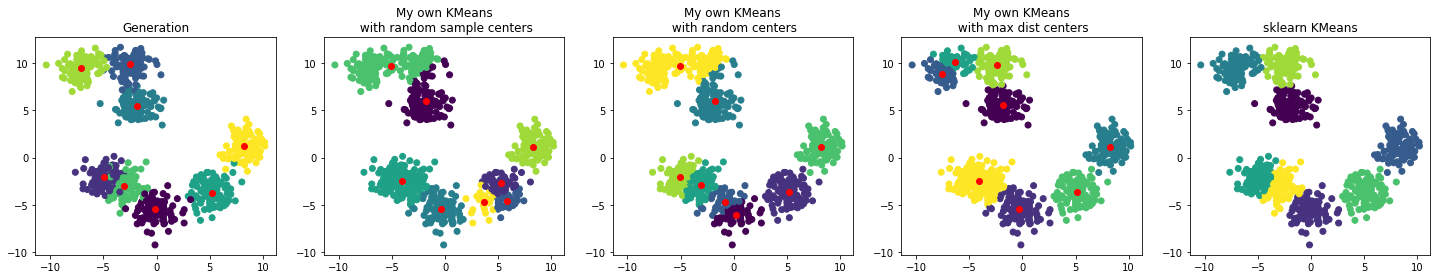

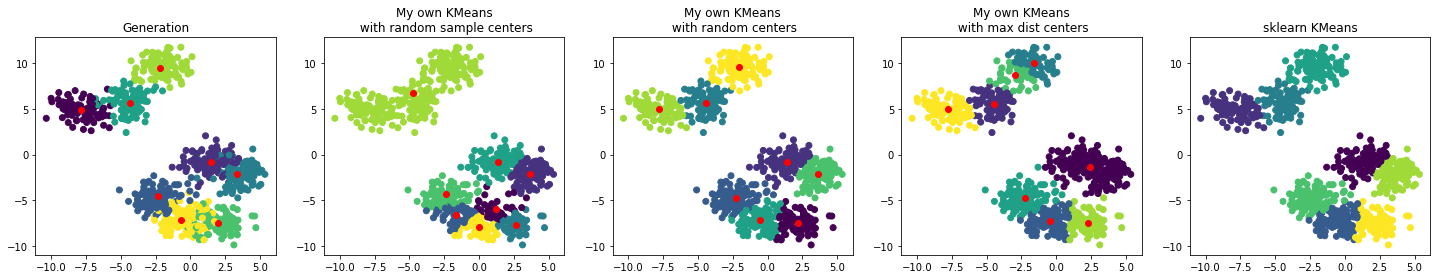

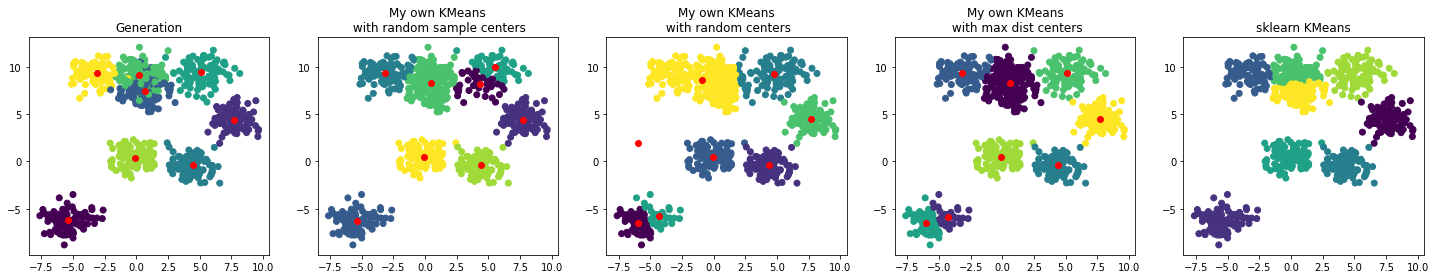

In [9]:
NUM_OF_TESTS = 5

SAMPLE_QUANTITY = 800
SAMPLE_FEATURES = 2
SAMPLE_CENTERS = 8
RAND_STATE = {3, 10, 50, 124, 95}
NUM_OF_CLUSTERS = 8
RAND_STATE_2 = 2

for i in RAND_STATE:
    plt.figure(figsize=(25,4))
    x, y, centers = make_blobs(n_samples = SAMPLE_QUANTITY, n_features = SAMPLE_FEATURES, 
                           centers = SAMPLE_CENTERS, random_state = i, return_centers = True)
    samples = x

    plt.subplot(1,5,1)
    plt.scatter(samples[:,0], samples[:,1], c = y)
    plt.scatter(centers[:, 0], centers[:, 1], c = "red")
    plt.title("Generation")

    plt.subplot(1,5,2)
    a = HMKmeans(samples, NUM_OF_CLUSTERS, RAND_STATE_2)
    plt.scatter(samples[:, 0], samples[:, 1], c = a)
    plt.scatter(cluster_centers_to_draw[:, 0], cluster_centers_to_draw[:, 1], c = "red")
    plt.title("My own KMeans\n with random sample centers")
    
    plt.subplot(1,5,3)
    a = HMKmeans(samples, NUM_OF_CLUSTERS, RAND_STATE_2, "random")
    plt.scatter(samples[:, 0], samples[:, 1], c = a)
    plt.scatter(cluster_centers_to_draw[:, 0], cluster_centers_to_draw[:, 1], c = "red")
    plt.title("My own KMeans\n with random centers")
    
    plt.subplot(1,5,4)
    a = HMKmeans(samples, NUM_OF_CLUSTERS, RAND_STATE_2, "max_dist")
    plt.scatter(samples[:, 0], samples[:, 1], c = a)
    plt.scatter(cluster_centers_to_draw[:, 0], cluster_centers_to_draw[:, 1], c = "red")
    plt.title("My own KMeans\n with max dist centers")


    plt.subplot(1,5,5)
    a = KMeans(n_clusters = NUM_OF_CLUSTERS, random_state = RAND_STATE_2).fit_predict(x)
    plt.scatter(x[:,0],x[:,1], c = a, )
    plt.title("sklearn KMeans")

## Taking a closer look at every centers generation type

## Different random states for each type:

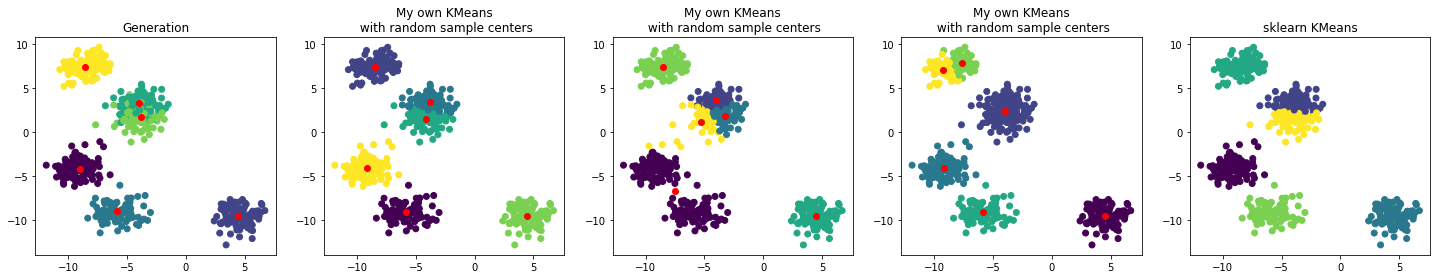

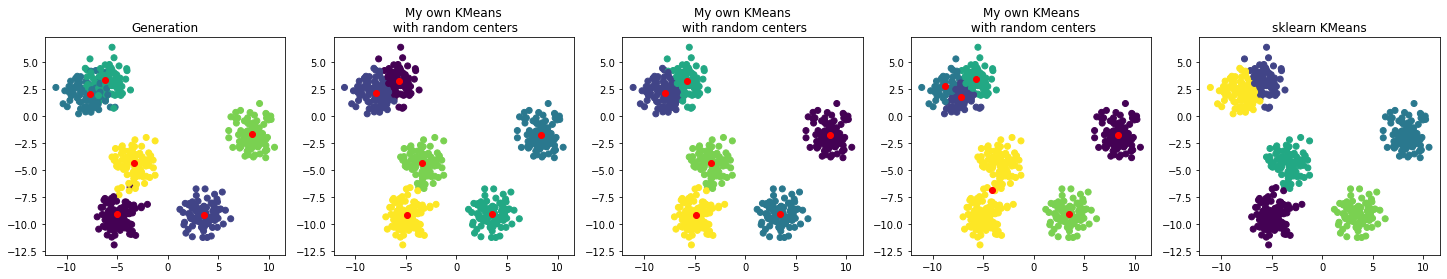

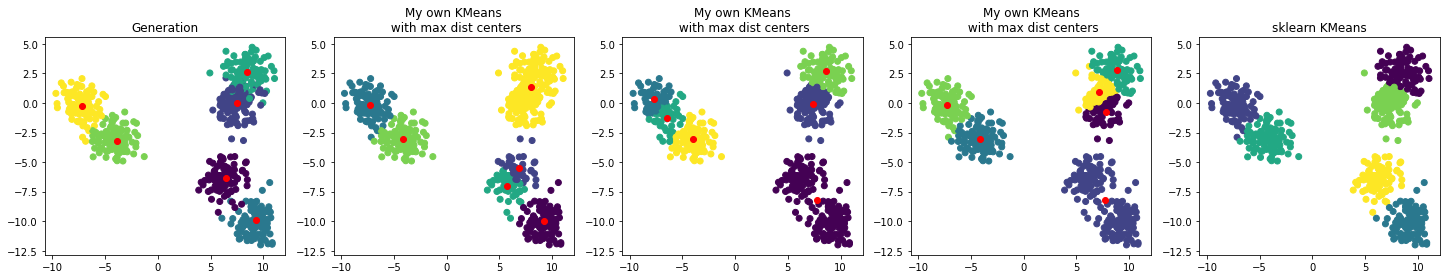

In [10]:
SAMPLE_QUANTITY = 600
SAMPLE_FEATURES = 2
SAMPLE_CENTERS = 6
RAND_STATE = [21, 41, 61]
NUM_OF_CLUSTERS = 6
RAND_STATES =[[25, 51, 91], [15, 30, 83], [5, 46, 78]]
TEXT = ["My own KMeans\n with random sample centers", "My own KMeans\n with random centers",
            "My own KMeans\n with max dist centers"]

for i in range(3):
    plt.figure(figsize=(25,4))
    
    x, y, centers = make_blobs(n_samples = SAMPLE_QUANTITY, n_features = SAMPLE_FEATURES, 
                               centers = SAMPLE_CENTERS, random_state = RAND_STATE[i], return_centers = True)
    samples = x

    plt.subplot(1,5,1)
    plt.scatter(samples[:,0], samples[:,1], c = y)
    plt.scatter(centers[:, 0], centers[:, 1], c = "red")
    plt.title("Generation")

    for j in range(3):
        plt.subplot(1,5, j + 2)
        a = HMKmeans(samples, NUM_OF_CLUSTERS, RAND_STATES[i][j])
        plt.scatter(samples[:, 0], samples[:, 1], c = a)
        plt.scatter(cluster_centers_to_draw[:, 0], cluster_centers_to_draw[:, 1], c = "red")
        plt.title(TEXT[i])

    plt.subplot(1,5,5)
    a = KMeans(n_clusters = NUM_OF_CLUSTERS, random_state = RAND_STATE[i]).fit_predict(x)
    plt.scatter(x[:,0],x[:,1], c = a, )
    plt.title("sklearn KMeans")

## Some intermediate results

In [11]:
# Overall: from random tests we can see that result clearly depends on the centers generation type and moreover
# there are still examples where all 3 results of different generation types don't match the Sklearn result. Yet there are 
# examples where one specific generation type was good and others weren't.
#
# Considering results of specific generation type with different random states we can say that the result also heavily depends
# on where the first centers are: some centers may be created where only one is needed and stay there until the end 
# of the process or there may be only 1 center where more is required.
#
# To sum up, even assuming that my algorithm is far from ideal, initialization straregy has a great influence 
# on the result as it may lead to unclear situations where one cluster may be divided into several smaller clusters
# and some small clusters may be identified as a big one.
#


## Mid-conclusition

In [12]:
# Speaking of questionable situations: KMeans result may differ from the result we wanted when generated clusters are close to 
# each other. 
#
# To conclude this part, I would like to talk about usability of KMeans: It is obvious that it's better to use it when we have 
# several distant groups of samples. Using it with groups which are pretty close to each other or with groups with various
# numbers of samples may lead to unappropriate result. Also KMeans algorithm shouldn't be used with just one big group
# of samples. And it worth mentioning that we can use KMeans with samples which can be described by some kind of numerical value
# and which may be evaluated with the mean numbers.

## Questionable example

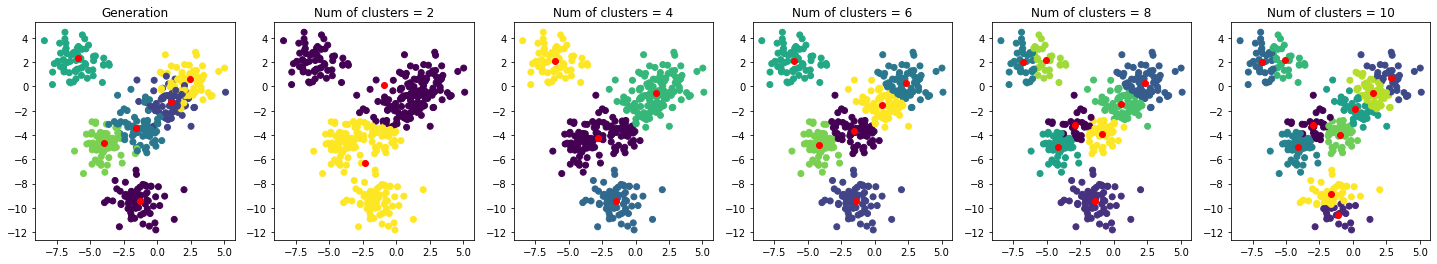

In [13]:
SAMPLE_QUANTITY = 400
SAMPLE_FEATURES = 2
SAMPLE_CENTERS = 6
RAND_STATE = 2

plt.figure(figsize=(25,4))
    
x, y, centers = make_blobs(n_samples = SAMPLE_QUANTITY, n_features = SAMPLE_FEATURES, 
                               centers = SAMPLE_CENTERS, random_state = RAND_STATE, return_centers = True)
samples = x

plt.subplot(1,6,1)
plt.scatter(samples[:,0], samples[:,1], c = y)
plt.scatter(centers[:, 0], centers[:, 1], c = "red")
plt.title("Generation")
i = 1
for j in range(2, 12, 2):
        i += 1
        plt.subplot(1, 6, i)
        a = HMKmeans(samples, j, RAND_STATE, "max_dist")
        plt.scatter(samples[:, 0], samples[:, 1], c = a)
        plt.scatter(cluster_centers_to_draw[:, 0], cluster_centers_to_draw[:, 1], c = "red")
        plt.title(f"Num of clusters = {j}")

##  What about the number of clusters? 

In [14]:
# One of the main problems of KMeans is that we don't know how many clusters our samples should be divided into. 
# To try to solve this problem I suggest considering the distance between cluster centers and samples of their clusters.
# My thoughts are based on a fact that distances within clusters should be relatievly small and if there are not enough
# clusters some samples will be far away from centers and the square of that already big distance will make a significant
# contribution to overall sum.
# So let's begin with simple sum of distances squares: 

## Sum of distances squares function

Text(0.5, 1.0, 'Generation')

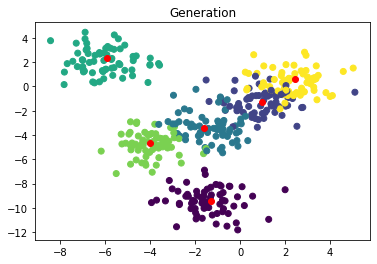

In [15]:
# I will begin the research with the same samples generation as above:
plt.scatter(samples[:,0], samples[:,1], c = y)
plt.scatter(centers[:, 0], centers[:, 1], c = "red")
plt.title("Generation")

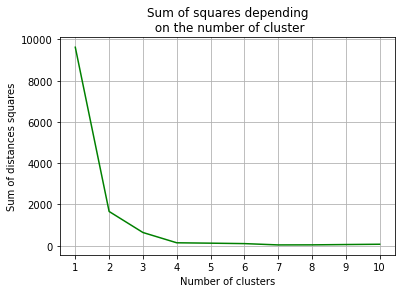

In [16]:
def sum_of_squares(samples, cluster_centers, a):
    sum = 0
    j = 0
    for i in cluster_centers:
        sum = np.sum(np.square(samples[(a == j)] - np.array(i)))
        j += 1
    return sum

TEST_NUM = 10
research_values = np.zeros([TEST_NUM, 2])
for i in range(1, TEST_NUM + 1):
    a = HMKmeans(samples, i, 2, "max_dist")
    research_values[i - 1] = [i, sum_of_squares(samples, cluster_centers_to_draw, a)]

plt.plot(research_values[:, 0], research_values[:, 1], c = "green")
plt.title("Sum of squares depending\n on the number of cluster")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of distances squares")
plt.xticks(range(1,TEST_NUM + 1))
plt.grid()

In [17]:
# On this step we can already see that when we reach certain number of clusters the sum stops decreasing and stays 
# with the same value. We can try to catch the moment when the difference between sum values becomes insignificant. 
# Yet we still can't figure out the exact number of clusters, so let's go even further and calculate the sum of average
# distances squares from cluster centers to their samples.

## Sum of average distances squares function

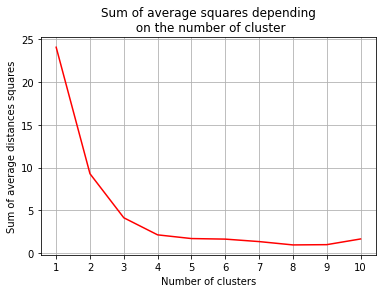

In [18]:
def average_sum_of_squares(samples, cluster_centers, a):
    sum = 0
    j = 0
    for i in cluster_centers:
        sum = np.sum(np.square(samples[(a == j)] - np.array(i))) / (a == j).sum()
        j += 1
    return sum

TEST_NUM = 10
research_values = np.zeros([TEST_NUM, 2])
for i in range(1, TEST_NUM + 1):
    a = HMKmeans(samples, i, 2, "max_dist")
    research_values[i - 1] = [i, average_sum_of_squares(samples, cluster_centers_to_draw, a)]

plt.plot(research_values[:, 0], research_values[:, 1], c = "red")
plt.title("Sum of average squares depending\n on the number of cluster")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of average distances squares")
plt.xticks(range(1,TEST_NUM + 1))
plt.grid()

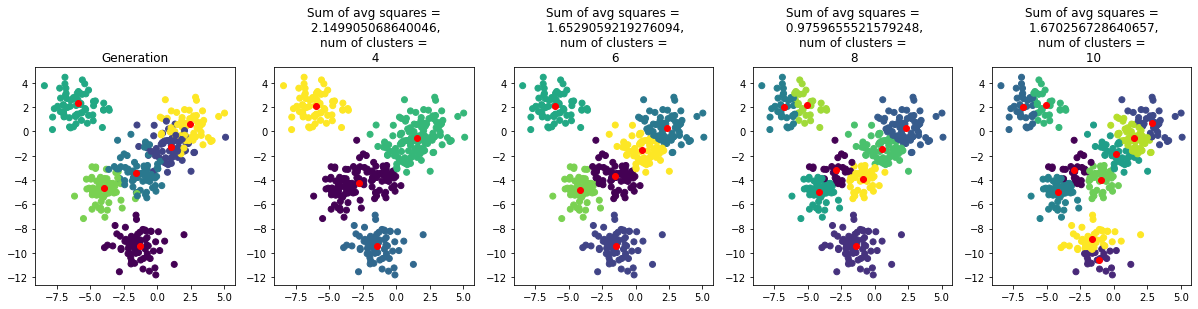

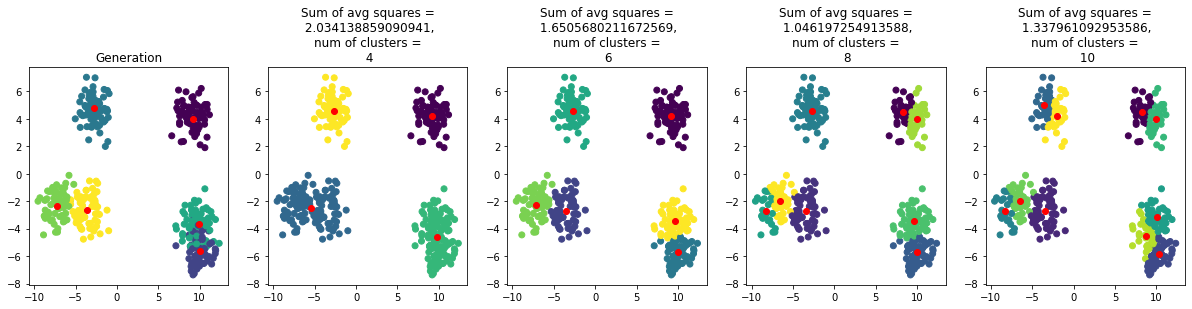

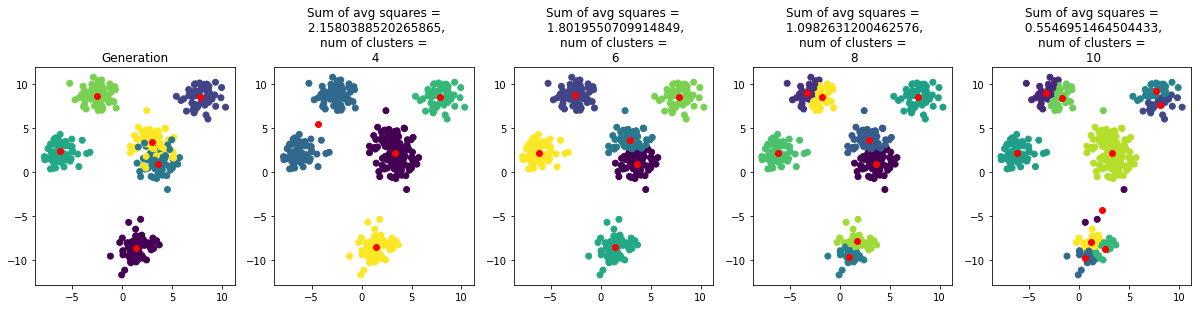

In [19]:
# So, as we can see, the situation has become better, but not that much.
# Let
SAMPLE_QUANTITY = 400
SAMPLE_FEATURES = 2
SAMPLE_CENTERS = 6
TEST_NUM_OF_CLUSTER = [4, 6, 8, 10]
TEST_RAND_STATES = [2, 24, 75]
for k in TEST_RAND_STATES:
    plt.figure(figsize=(25,4))
    plt.subplot(1,6,1)
    x, y, centers = make_blobs(n_samples = SAMPLE_QUANTITY, n_features = SAMPLE_FEATURES, 
                               centers = SAMPLE_CENTERS, random_state = k, return_centers = True)
    samples = x
    plt.scatter(samples[:,0], samples[:,1], c = y)
    plt.scatter(centers[:, 0], centers[:, 1], c = "red")
    plt.title("Generation")
    i = 1
    
    for j in TEST_NUM_OF_CLUSTER:
            i += 1
            plt.subplot(1, 6, i)
            a = HMKmeans(samples, j, 2, "max_dist")
            plt.scatter(samples[:, 0], samples[:, 1], c = a)
            plt.scatter(cluster_centers_to_draw[:, 0], cluster_centers_to_draw[:, 1], c = "red")
            plt.title(f"Sum of avg squares =\n {average_sum_of_squares(samples, cluster_centers_to_draw, a)},\nnum of clusters =\n {j}")

In [20]:
# Overall, this method doesn't work very well, but it may help exclude clearly bad numbers of clusters.

## Time Consumption

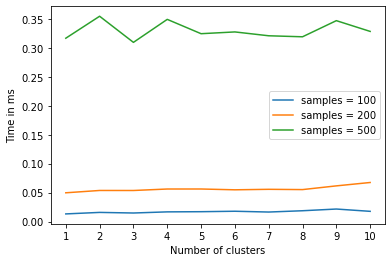

In [21]:
sample_quantity_numbers = np.array([100, 200, 500])
clusters_quantity = np.arange(1,11)
fig = plt.figure()
ax = plt.axes()
for i in range(sample_quantity_numbers.size):
    z = np.zeros(clusters_quantity.size)
    k = 0
    for j in clusters_quantity:
        x, y = make_blobs(n_samples = sample_quantity_numbers[i], n_features = 2, 
                               centers = j, random_state = 5)
        samples = x
        z[k] = timeit.default_timer()
        a = HMKmeans(samples, j, 2, "max_dist")
        z[k] = timeit.default_timer() - z[k]
        k += 1
    ax.plot(clusters_quantity, z, label=f'samples = {sample_quantity_numbers[i]}')
    
    plt.xticks(range(1, clusters_quantity.size + 1))
plt.xlabel("Number of clusters")
plt.ylabel("Time in ms")
plt.legend()

In [22]:
# Due to me being unexperienced in Python and not using all of its potential the time consuption of my K-Means is enormous
# and can't be compared with the SKlearn K-Means at all. 

## Visualisation of pairwise distances 

<AxesSubplot:>

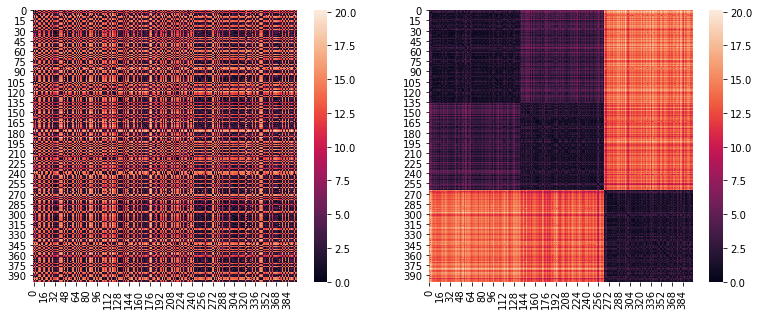

In [23]:
# Let's make another example for visualisation

x, y = make_blobs(n_samples = 400, n_features = 2, 
                  centers = 3, random_state = 25)
samples = x

samples_distance = np.zeros([400, 400])

for i in range(400):
    for j in range(i + 1, 400):
        samples_distance[i][j] = samples_distance[j][i] = find_sample_distance(i,j)

a = HMKmeans(samples, 3, 4,"random_samples")

# Time to sort samples 

a = np.argsort(a)
samples_distance_2 = np.zeros([400, 400])
for i in range(400):
    for j in range(i + 1, 400):
        samples_distance_2[i][j] = samples_distance_2[j][i] = samples_distance[a[j],a[i]]      
        
plt.figure(figsize = (13, 5))
 
plt.subplot(1,2,1)
sns.heatmap(samples_distance) 
 
plt.subplot(1,2,2)
sns.heatmap(samples_distance_2)



## How to logically sort clusters?

In [24]:
# The result above gave me an idea: we may sort clusters by distance increase between them :
# We may choose first cluster randomly and sort others so the next cluster would be the closest one to the first and etc.
# So I made another blob with more clusters

Text(995.1529411764707, 0.5, 'Cluster number')

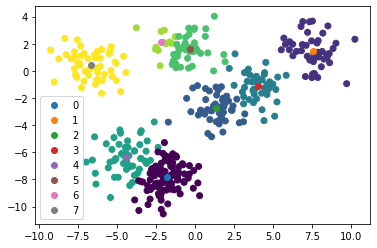

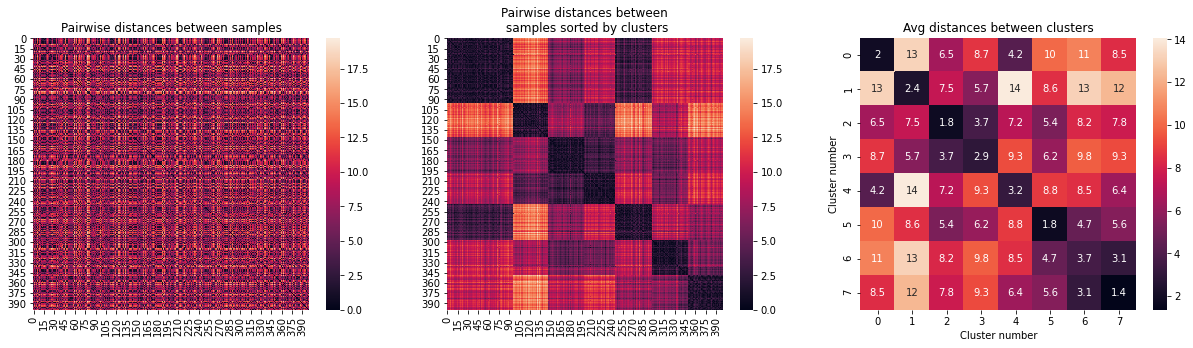

In [26]:
x, y = make_blobs(n_samples = 400, n_features = 2, 
                  centers = 8, random_state = 25)
samples = x

samples_distance = np.zeros([400, 400])

for i in range(400):
    for j in range(i + 1, 400):
        samples_distance[i][j] = samples_distance[j][i] = find_sample_distance(i,j)

a = HMKmeans(samples, 8, 4,"random_samples")
plt.scatter(samples[:, 0], samples[:, 1], c = a)


for i in range(8):
    plt.scatter(cluster_centers_to_draw[i, 0], cluster_centers_to_draw[i, 1], label = f"{i}")
plt.legend()
# Time to sort samples 

b = np.argsort(a)
samples_distance_2 = np.zeros([400, 400])
for i in range(400):
    for j in range(i + 1, 400):
        samples_distance_2[i][j] = samples_distance_2[j][i] = samples_distance[b[j],b[i]]      
        
plt.figure(figsize = (21, 5))
 
plt.subplot(1,3,1)
sns.heatmap(samples_distance)
plt.title("Pairwise distances between samples")
 
plt.subplot(1,3,2)
sns.heatmap(samples_distance_2)
plt.title("Pairwise distances between\n samples sorted by clusters")

avg_cluster_dist = np.zeros([8,8])
prev_quant_1 = 0
for i in range(8):
    j = i
    prev_quant_2 = 0
    for j in range(8):
        avg_cluster_dist[i,j] = avg_cluster_dist[j,i] = \
            np.sum(samples_distance_2[prev_quant_1 :prev_quant_1 + \
                    (a == i).sum() + 1, prev_quant_2 : prev_quant_2 + (a == j).sum() + 1])/ \
                        (((a == j).sum())*((a == i).sum()))
        prev_quant_2 += (a == j).sum() + 1
    prev_quant_1 += (a == i).sum() + 1
    

plt.subplot(1,3,3)
sns.heatmap(avg_cluster_dist, annot = True)
plt.title("Avg distances between clusters")
plt.xlabel("Cluster number")
plt.ylabel("Cluster number")


Text(452.23636363636354, 0.5, 'Cluster number')

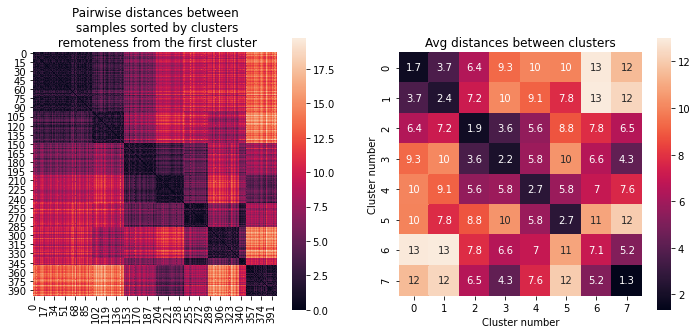

In [28]:
cluster_distances = np.zeros([8,2])
for i in range(8):
    cluster_distances[i] = [np.sqrt(np.sum(np.square(cluster_centers_to_draw[i] - cluster_centers_to_draw[0]))), i]
cluster_distances[0] = [2*np.max(cluster_distances), 0]
for i in range(1, 8):
    cluster_distances[np.argmin(cluster_distances[:,0])] = [2*np.max(cluster_distances[:,0]), i]
for i in range(400):
    b[i] = cluster_distances[a[i].astype(int),1]
    

c = np.argsort(b)
samples_distance_2 = np.zeros([400, 400])
for i in range(400):
    for j in range(i + 1, 400):
        samples_distance_2[i][j] = samples_distance_2[j][i] = samples_distance[c[j],c[i]]      

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
sns.heatmap(samples_distance_2, square = True)
plt.title("Pairwise distances between\n samples sorted by clusters\n remoteness from the first cluster")

plt.subplot(1,2,2)
avg_cluster_dist = np.zeros([8,8])
prev_quant_1 = 0
for i in range(8):
    j = i
    prev_quant_2 = 0
    for j in range(8):
        avg_cluster_dist[i,j] = avg_cluster_dist[j,i] = \
            np.sum(samples_distance_2[prev_quant_1 :prev_quant_1 + \
                    (b == i).sum() + 1, prev_quant_2 : prev_quant_2 + (b == j).sum() + 1])/ \
                        (((b == j).sum())*((b == i).sum()))
        prev_quant_2 += (b == j).sum() + 1
    prev_quant_1 += (b == i).sum() + 1
    
sns.heatmap(avg_cluster_dist, square = True, annot = True)
plt.title("Avg distances between clusters")
plt.xlabel("Cluster number")
plt.ylabel("Cluster number")

In [ ]:
# So, as we can see, out visualisation became less chaoitic and more structured.
# And on that note, I would like to end my research.